## Image Enhancement

- Input dari 'data/raw/RiceLeafsv3/train' (diunduh dari Kaggle)
- Output enhancement disimpan di 'data/processed/enhanced'

### Proses enhancement:

Raw Image -> Noise Reduction (Gaussian Blur) -> Contrast Enhancement (CLAHE)

In [1]:
import sys
print(sys.executable)


d:\Bismillah Kuliah\Semester 3\TPSC\New folder\rice-leaf-disease-ml\venv\Scripts\python.exe


In [9]:
# Import dependencies
import kagglehub
import shutil
import os

import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import filters, measure, morphology

# Import data from Kaggle
extract_path = "../data/raw"  # desination folder
dataset_dir  = os.path.join(extract_path, "RiceLeafsv3")  # data/raw/RiceLeafsv3

if os.path.exists(dataset_dir) and os.listdir(dataset_dir):
    print("Dataset already exists at:", dataset_dir)
else:
    print("Downloading dataset from Kaggle...")
    file_path = kagglehub.dataset_download("adefiqri12/riceleafsv3/versions/2")
    print("Downloaded to cache:", file_path)
    shutil.copytree(file_path, extract_path, dirs_exist_ok=True)
    print("Copied dataset into:", extract_path)
    print("Now you should have:", os.listdir(extract_path))

# Image Path
source_path = os.path.join(extract_path, 'RiceLeafsv3/train')
categories = [
    'bacterial_leaf_blight', 'brown_spot', 'healthy',
    'leaf_blast', 'leaf_scald', 'narrow_brown_spot'
]

100%|██████████| 307M/307M [03:42<00:00, 1.45MB/s] 

Extracting files...


Downloaded to cache: C:\Users\azhar\.cache\kagglehub\datasets\adefiqri12\riceleafsv3\versions\2
Copied dataset into: ../data/raw
Now you should have: ['processed', 'RiceLeafsv3']


../data/raw\RiceLeafsv3/train\bacterial_leaf_blight\bacterial_leaf_blight (1).JPG
../data/raw\RiceLeafsv3/train\bacterial_leaf_blight\bacterial_leaf_blight (2).JPG
../data/raw\RiceLeafsv3/train\bacterial_leaf_blight\bacterial_leaf_blight (3).JPG
../data/raw\RiceLeafsv3/train\brown_spot\brown_spot (1).jpg
../data/raw\RiceLeafsv3/train\brown_spot\brown_spot (2).jpg
../data/raw\RiceLeafsv3/train\brown_spot\brown_spot (3).jpg
../data/raw\RiceLeafsv3/train\healthy\healthy (1).jpg
../data/raw\RiceLeafsv3/train\healthy\healthy (2).jpg
../data/raw\RiceLeafsv3/train\healthy\healthy (3).jpg
../data/raw\RiceLeafsv3/train\leaf_blast\leaf_blast (1).jpg
../data/raw\RiceLeafsv3/train\leaf_blast\leaf_blast (2).jpg
../data/raw\RiceLeafsv3/train\leaf_blast\leaf_blast (3).jpg
../data/raw\RiceLeafsv3/train\leaf_scald\leaf_scald (1).jpg
../data/raw\RiceLeafsv3/train\leaf_scald\leaf_scald (2).jpg
../data/raw\RiceLeafsv3/train\leaf_scald\leaf_scald (3).jpg
../data/raw\RiceLeafsv3/train\narrow_brown_spot\narr

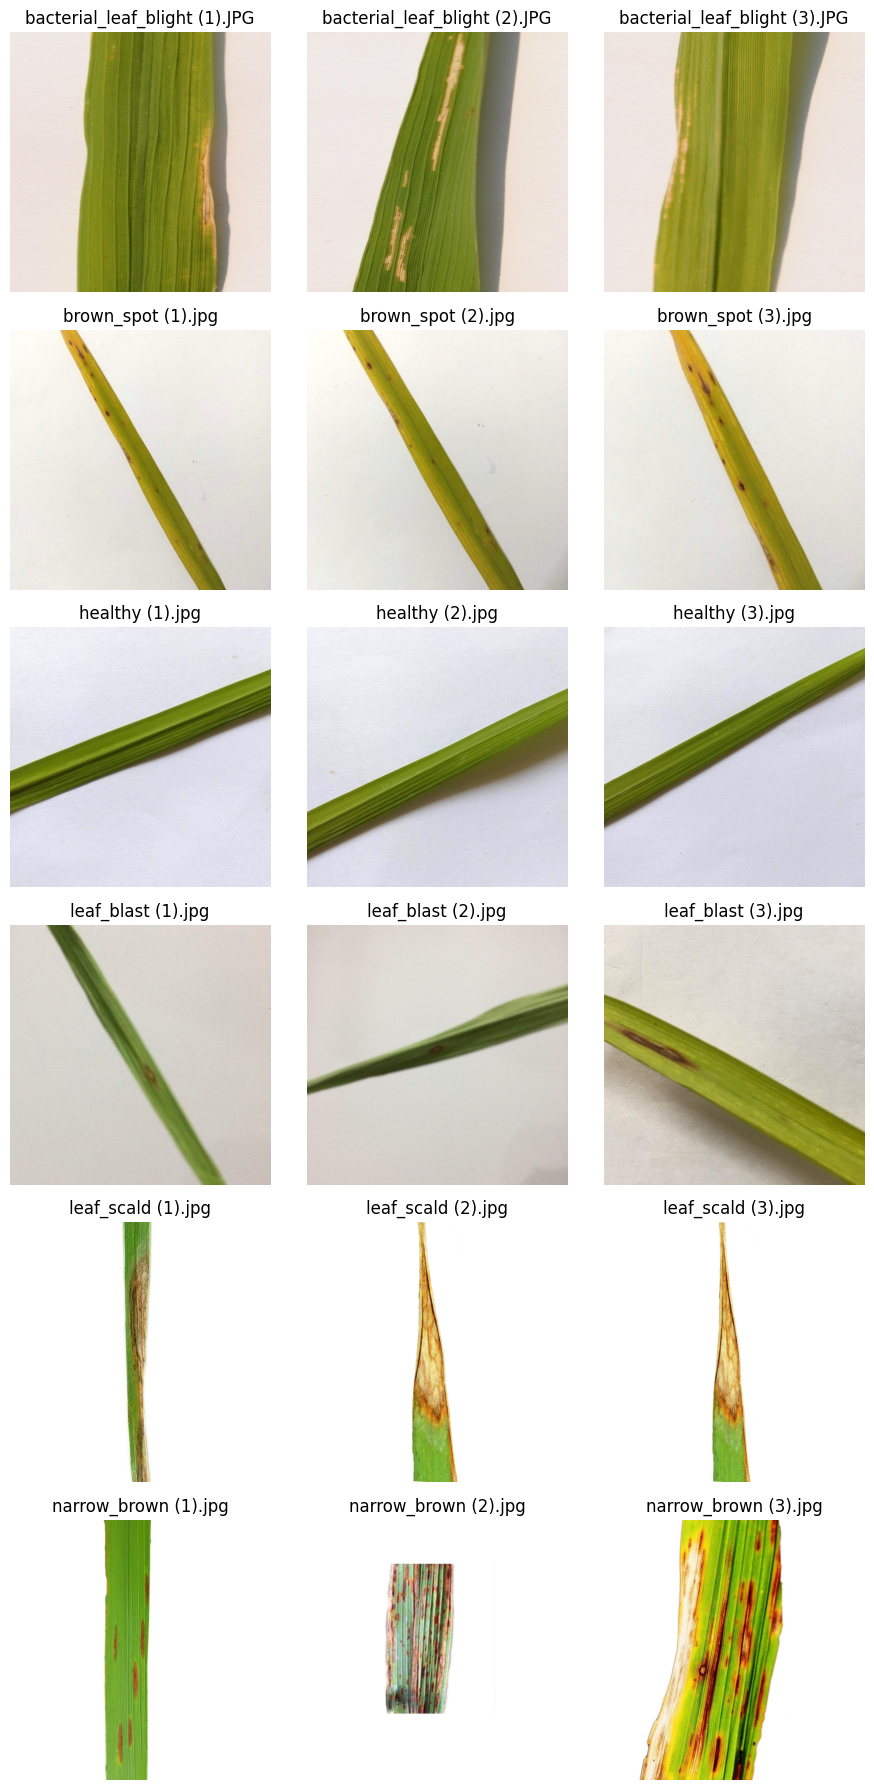

In [11]:
# Preview Images
plt.figure(figsize=(15, 18))

for i, category in enumerate(categories):
  folder = os.path.join(source_path, category)
  files = [f for f in os.listdir(folder)]
  files.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))  # urutin nomer

  for j, filename in enumerate(files[:3]):
    img_path = os.path.join(folder, filename)
    print(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(len(categories), 5, i * 5 + j + 1)
    plt.imshow(img)
    plt.title(filename)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [1]:
# IMAGE ENHANCEMENT

for category in categories:
    input_dir = os.path.join(source_path, category)
    output_dir = os.path.join('../data/processed/enhanced', category)
    os.makedirs(output_dir, exist_ok=True)

    files = [f for f in os.listdir(input_dir)]
    files.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))  # urutin nomer

    for i, file in enumerate(files):
        img_path = os.path.join(input_dir, file)

        # 1. Raw Image
        img = cv2.imread(img_path)
        raw_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # 2. Noise Reduction (Gaussian Blur)
        denoised = cv2.GaussianBlur(raw_rgb, (5, 5), 0)

        # 3. Contrast Enhancement (CLAHE)
        lab = cv2.cvtColor(denoised, cv2.COLOR_RGB2LAB)
        l_channel, a_channel, b_channel = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl = clahe.apply(l_channel)
        limg = cv2.merge((cl, a_channel, b_channel))
        enhanced = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)


        # Save gambar
        output_file = os.path.join(output_dir, file)
        cv2.imwrite(output_file, cv2.cvtColor(enhanced, cv2.COLOR_RGB2BGR))

        # Preview hasil

        preview_limit = 1 # limit preview
        if i < preview_limit:
            titles = ['Raw RGB', 'Noise Reduced', 'CLAHE Enhanced']
            images = [raw_rgb, denoised, enhanced]

            plt.figure(figsize=(12, 4))
            for i in range(len(titles)):
                plt.subplot(1, len(titles), i + 1)
                plt.imshow(images[i], cmap='gray' if i > 0 else None)
                plt.title(titles[i])
                plt.axis('off')
            plt.suptitle(f"{category} - {file}", fontsize=10)
            plt.tight_layout()
            plt.show()

NameError: name 'categories' is not defined